In [35]:
from skimage import io
from skimage import transform
import numpy as np
import random
import math

# Funcion which creates array of puzzle pieces
# From a given picture

def from_image_to_pieces(image_path, n_rows, n_cols):
  
  image = io.imread(image_path)

  size = image.shape
  size = min(size[0], size[1])
  
  image = image[0:size, 0:size]

  step = math.floor(size / n_rows)
  
  pieces = []
  index = 0

  for i in range(n_rows):
    for j in range(n_cols):
      # Ovde je neophodno pamtiti par jer kad se radi shuffle te dve vrednosti moraju da ostanu zajedno
      pieces.append([np.array(image[i*step: (i+1)*step, j*step : (j+1)*step]), index])
      index += 1

  # pieces je lista listi pri cemu se svaka unutrasnja lista
  # sastoji od dva elementa gde je prvi deo slike, a drugi je
  # indeks dela u originalnoj slici 

  return pieces, step

pieces, step = from_image_to_pieces("lion.jpg", 5, 5)

In [36]:
def shuffle(pieces):
  random.shuffle(pieces)

  result = []
  rotations = []

  for x in pieces:
    (image, index) = x

    i = random.randint(0, 4)
    rotations.append(i)
    x = transform.rotate(image, i*90)
    result.append((x, index))

  return result, rotations

pieces, rotations = shuffle(pieces)

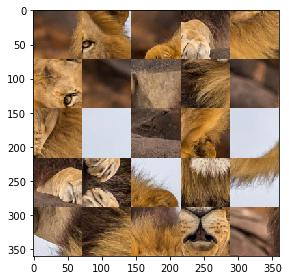

In [41]:
def make_image(pieces, step, n_rows, n_cols):

  image = np.array([])
  image = np.resize(image, (n_rows*step, n_cols*step, 3))

  for i in range(n_rows):
    for j in range(n_cols):
      piece, index = pieces[i*5+j]
      image[i*step : (i+1)*step, j*step : (j+1)*step] = piece
    
  io.imshow(image)
  io.imsave("slika.jpg", image)

  #return image
  
make_image(pieces, step, 5, 5)

In [38]:
class Chromosome:

  def __init__(self, genetic_code, fittness, rotations):
    self.fittness = fittness
    self.genetic_code = genetic_code
    self.rotations = rotations


Streaming output truncated to the last 5000 lines.
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.42325

5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.423252594
5188670.42

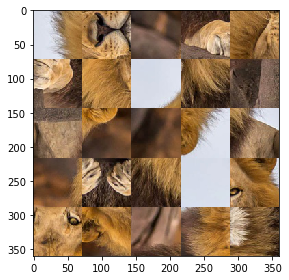

In [55]:
class GeneticAlgorithm:

  def __init__(self, image_path, n_rows):

    self.path = image_path                    # putanja do polazne slike
    self.n_rows = n_rows                      # broj redova u slagalici, u nasem slucaju ce broj kolona biti isti
    self.population_size = 100                # velicina populacije
    self.max_iteration = 300                  # broj iteracija algoritma
    self.tournament_size = 10                 # velicina jednog turnira u selekciji
    self.mutation_rate = 0.1                  # verovatnoca mutacije
    self.selection_type = 'tournament'        # tip selekcije
    self.selection_size = 100                 # velicina selekcije
    self.elite_size = 10                      # broj najboljih jedinki koje treba proslediti u narednu generaciju

  def get_diff(self, piece, ind, population):

    # piece je jedan deo slagalice, matrica size x size
    # population je lista listi od dva elementa, gde je prvi element deo slagalice,
    # a drugi indeks tog dela u polaznoj slagalici

    i = int(ind / 5)
    j = ind % 5

    #print(f"i: {i}, j: {j}")

    if i == 4 and j == 4:
      return 0

    if i == 4:
      next, index = population[ind+1]
      next_left_edge = next[:][0]

      piece_right_edge = piece[:][-1]


      #print("Piece right edge:")
      #print(piece_right_edge)

      #print("Next left edge:")
      #print(next_left_edge)

      result = 0

      for i in range(len(next_left_edge)):
        for j in range(3):
          result += next_left_edge[j] - piece_right_edge[j]

      return sum(result)

    if j == 4:
      next, index = population[ind+5]
      next_up_edge = next[0][:]

      piece_down_edge = piece[-1][:]

      result = 0

      for i in range(len(next_up_edge)):
        for j in range(3):
          result += abs(next_up_edge[j] - piece_down_edge[j])

      return sum(result)

    next_left, _ = population[ind+1]
    next_down, _ = population[ind+5]

    next_left_left_edge = next_left[:][0]
    next_down_up_edge = next_down[0][:]

    piece_right_edge = piece[:][-1]
    piece_down_edge = piece[-1][:]

    result = 0
    for i in range(len(next_down_up_edge)):
      for j in range(3):
        result += (next_left_left_edge[j] - piece_right_edge[j]) + (next_down_up_edge[j] - piece_down_edge[j])

    return sum(result)
 
  def calculate_fittness(self, genetic_code):

    fittness = 0
    # genetic_code je lista listi od dva elementa gde je prvi cela slagalica,
    # a drugi je pozicija tog dela u originalnoj slici

    for i in range(len(genetic_code)):
      piece, ind = genetic_code[i]
      fittness += self.get_diff(piece, i, genetic_code)**2

    #print("===========================================================")

    return fittness
            
    
  def init_population(self):

    population = []
    rotations = []
    init_puzzle, step = from_image_to_pieces(self.path, self.n_rows, self.n_rows)

    for i in range(self.population_size):
      result, rot = shuffle(init_puzzle)
      population.append(result)
      rotations.append(rot)

    new_pop = []

    for i in range(len(population)):
      x = population[i]
      rot = rotations[i]

      fittness = self.calculate_fittness(x)
      #print(fittness)
      new_pop.append(Chromosome(x, fittness, rot))

    return new_pop, step


  def selection(self, population, elite = False):

    # we will think about this later
    # population = sorted(population, key=lambda x: x[0].fittness)

    selection = []
    if elite == True:
      if self.elite_size > self.selection_size:
        selection = population[0:selection_size]
        return selection
      else:
        selection = population[0:elite_size]

    for i in range(self.selection_size - self.elite_size):
      tourn = random.sample(population, self.tournament_size)
      selection.append(max(tourn, key=lambda x: x.fittness))

    return selection

  def is_end(self, pieces):

    pieces = pieces.genetic_code

    for i in range(len(pieces)):
      x, index = pieces[i]
      if index != i:
        return False

    return True

  def cross(self, selection):
    return selection

  def mutation(self, selection):
    return selection

  def Optimize(self):

    population, step = self.init_population()

    global_best = Chromosome(None, math.inf, None)


    for i in range(self.max_iteration):

      # Ima neka greska u selection
      selected = self.selection(population)

      population = self.cross(selected)
      population = self.mutation(selected)

      best = min(population, key=lambda x: x.fittness)

      if best.fittness < global_best.fittness:
        global_best = best

      print(f"Najmanji fittness: {global_best.fittness}")

      if (self.is_end(best)):
        break

    return global_best, step

GA = GeneticAlgorithm("lion.jpg", 5)

best, step = GA.Optimize()

make_image(best.genetic_code, step, 5, 5)

